In [43]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plot

In [44]:
url1 = '/Users/mac/Downloads/admission4.csv'
perf1 = pd.read_csv(url1)
names=['age','major','work','IAT','self','HPC','Female','Male','Grad','GradO','High','HighO','Univ','UniO']
names = np.array(names)
np.shape(perf1)

(998, 12)

In [45]:
y = np.array(perf1['impr'])
data = np.array(perf1)
ohe = pd.get_dummies(perf1[['sex','edu']])


In [46]:
x= np.c_[data[:,2],data[:,5:10],np.array(ohe)]
x[0]

array([27, False, True, 27, 3, 11, 1, 0, 0, 0, 0, 1, 0, 0], dtype=object)

In [47]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 531)
#print(len(xTrain), len(xTest))
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)
xTrain[1]

array([ 2.33333333,  0.        ,  0.        ,  0.375     , -1.        ,
       -0.4       ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [56]:

mseOos = []
nTreeList = range(100, 360, 10)

for iTrees in nTreeList:
    depth = None
    maxFeat = 12 
    perfRFModel = ensemble.RandomForestRegressor(n_estimators=iTrees,
                    max_depth=depth, max_features=maxFeat,
                    oob_score=False, random_state=531)
    perfRFModel.fit(xTrain, yTrain)
    #데이터 세트에 대한 MSE 누적
    prediction = perfRFModel.predict(xTest)
    mseOos.append(mean_squared_error(yTest, prediction))
print("MSE")
print(mseOos)

MSE
[24.704385666666667, 24.854983195592286, 24.726793518518516, 24.8590224852071, 24.856627040816328, 24.86315466666667, 24.85750794270833, 24.781854094579007, 24.701902983539092, 24.768287719298243, 24.76470425, 24.77015873015873, 24.808434779614323, 24.728412350346563, 24.6881369212963, 24.709037173333332, 24.716917850098618, 24.691215637860083, 24.660005187074834, 24.66814058660325, 24.691058703703703, 24.71386434269858, 24.715407324218745, 24.743834710743798, 24.703339446366783, 24.64406318367347]


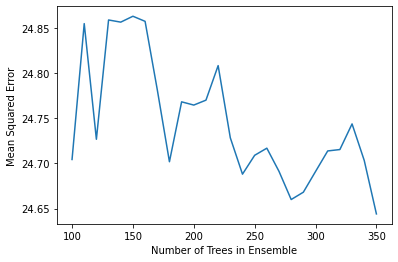

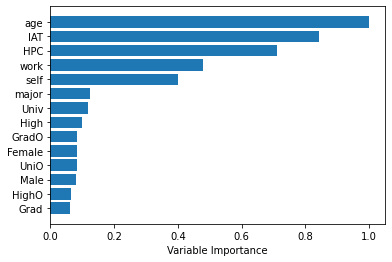

In [57]:
plot.plot(nTreeList, mseOos)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()

#피처 중요도 도표 그리기
featureImportance = perfRFModel.feature_importances_

#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos, names[sorted_idx])
plot.xlabel('Variable Importance')
plot.show()